In [1]:
%pip install opencv-python-headless
%pip install numpy
%pip install tkinter
%pip install keras
%pip install matplotlib
%pip install scikit-learn
%pip install imutils
%pip install np_utils


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py) ... - \ done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25834 sha256=e1a7312ff62a66ebf4827c0f61deead116b2e1fd9901ecb29e6c08b75d613985
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3

In [2]:
import cv2
import numpy as np
import os
import sys
import time
from tkinter import Tk
from tkinter import filedialog
from tkinter import Tcl
import imutils


In [3]:
def get_file_list(file_extension, folder_path):
    in_folder_path = folder_path

    files = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(in_folder_path):
        for file in f:
            if file_extension in file:
                files.append(os.path.join(r, file))

    # print(len(files))
    return Tcl().call('lsort', '-dict', files)

def get_file_name_and_ext(file_path):
    file_name, file_ext = os.path.splitext(os.path.basename(file_path))
    return file_name, file_ext


In [4]:
def digit_to_label(digit):
  label = int(digit)
  if label == 0:
    label = 'overripe'
  elif label == 1:
    label = 'ripe'
  elif label == 2:
    label = 'semi_ripe'
  elif label == 3:
    label = 'unripe'
  return label

In [5]:
def resize_image(img_path, dim = (64, 64)):
    image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    # resize image
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

In [6]:
total_labels = []

def get_image_data(dir_path, file_ext=".png"):
    data = []
    labels = []
    start_time = time.time()
    img_files = get_file_list(file_ext, dir_path)
    for img_path in img_files:
      image_name, image_ext = get_file_name_and_ext(img_path)
      img_label = image_name.split('_')[0]
      
      # resize image
      resized_image = resize_image(img_path)
      # x = np.expand_dims(resized_image, axis=0)
      data.append(resized_image)
      labels.append(img_label)
    end_time = time.time()
    print(f"{len(img_files)} image files have been loaded in {round((end_time - start_time), 2)} seconds.\n")
    return np.array(data), labels


In [7]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
file_ext = ".png"
dir_train_path = "/kaggle/input/crop-coffee-process/crop_process/train"
dir_test_path = "/kaggle/input/crop-coffee-process/crop_process/test"
X_train, Y_train = get_image_data(dir_train_path)
X_test, Y_test = get_image_data(dir_test_path)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
print(f"Length of X_train: {len(X_train)}\nLength of Y_train: {len(Y_train)}\nLength of X_test: {len(X_test)}\nLength of Y_test: {len(Y_test)}")
X = ""
Y = ""

38014 image files have been loaded in 200.25 seconds.

6729 image files have been loaded in 87.43 seconds.

Length of X_train: 38014
Length of Y_train: 38014
Length of X_test: 6729
Length of Y_test: 6729


In [8]:
print(X_train[0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [9]:
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
from matplotlib import pyplot as plt
# Simple CNN model for CIFAR-10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
import keras.utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

2024-07-17 03:57:29.962177: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 03:57:29.962284: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 03:57:30.104580: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


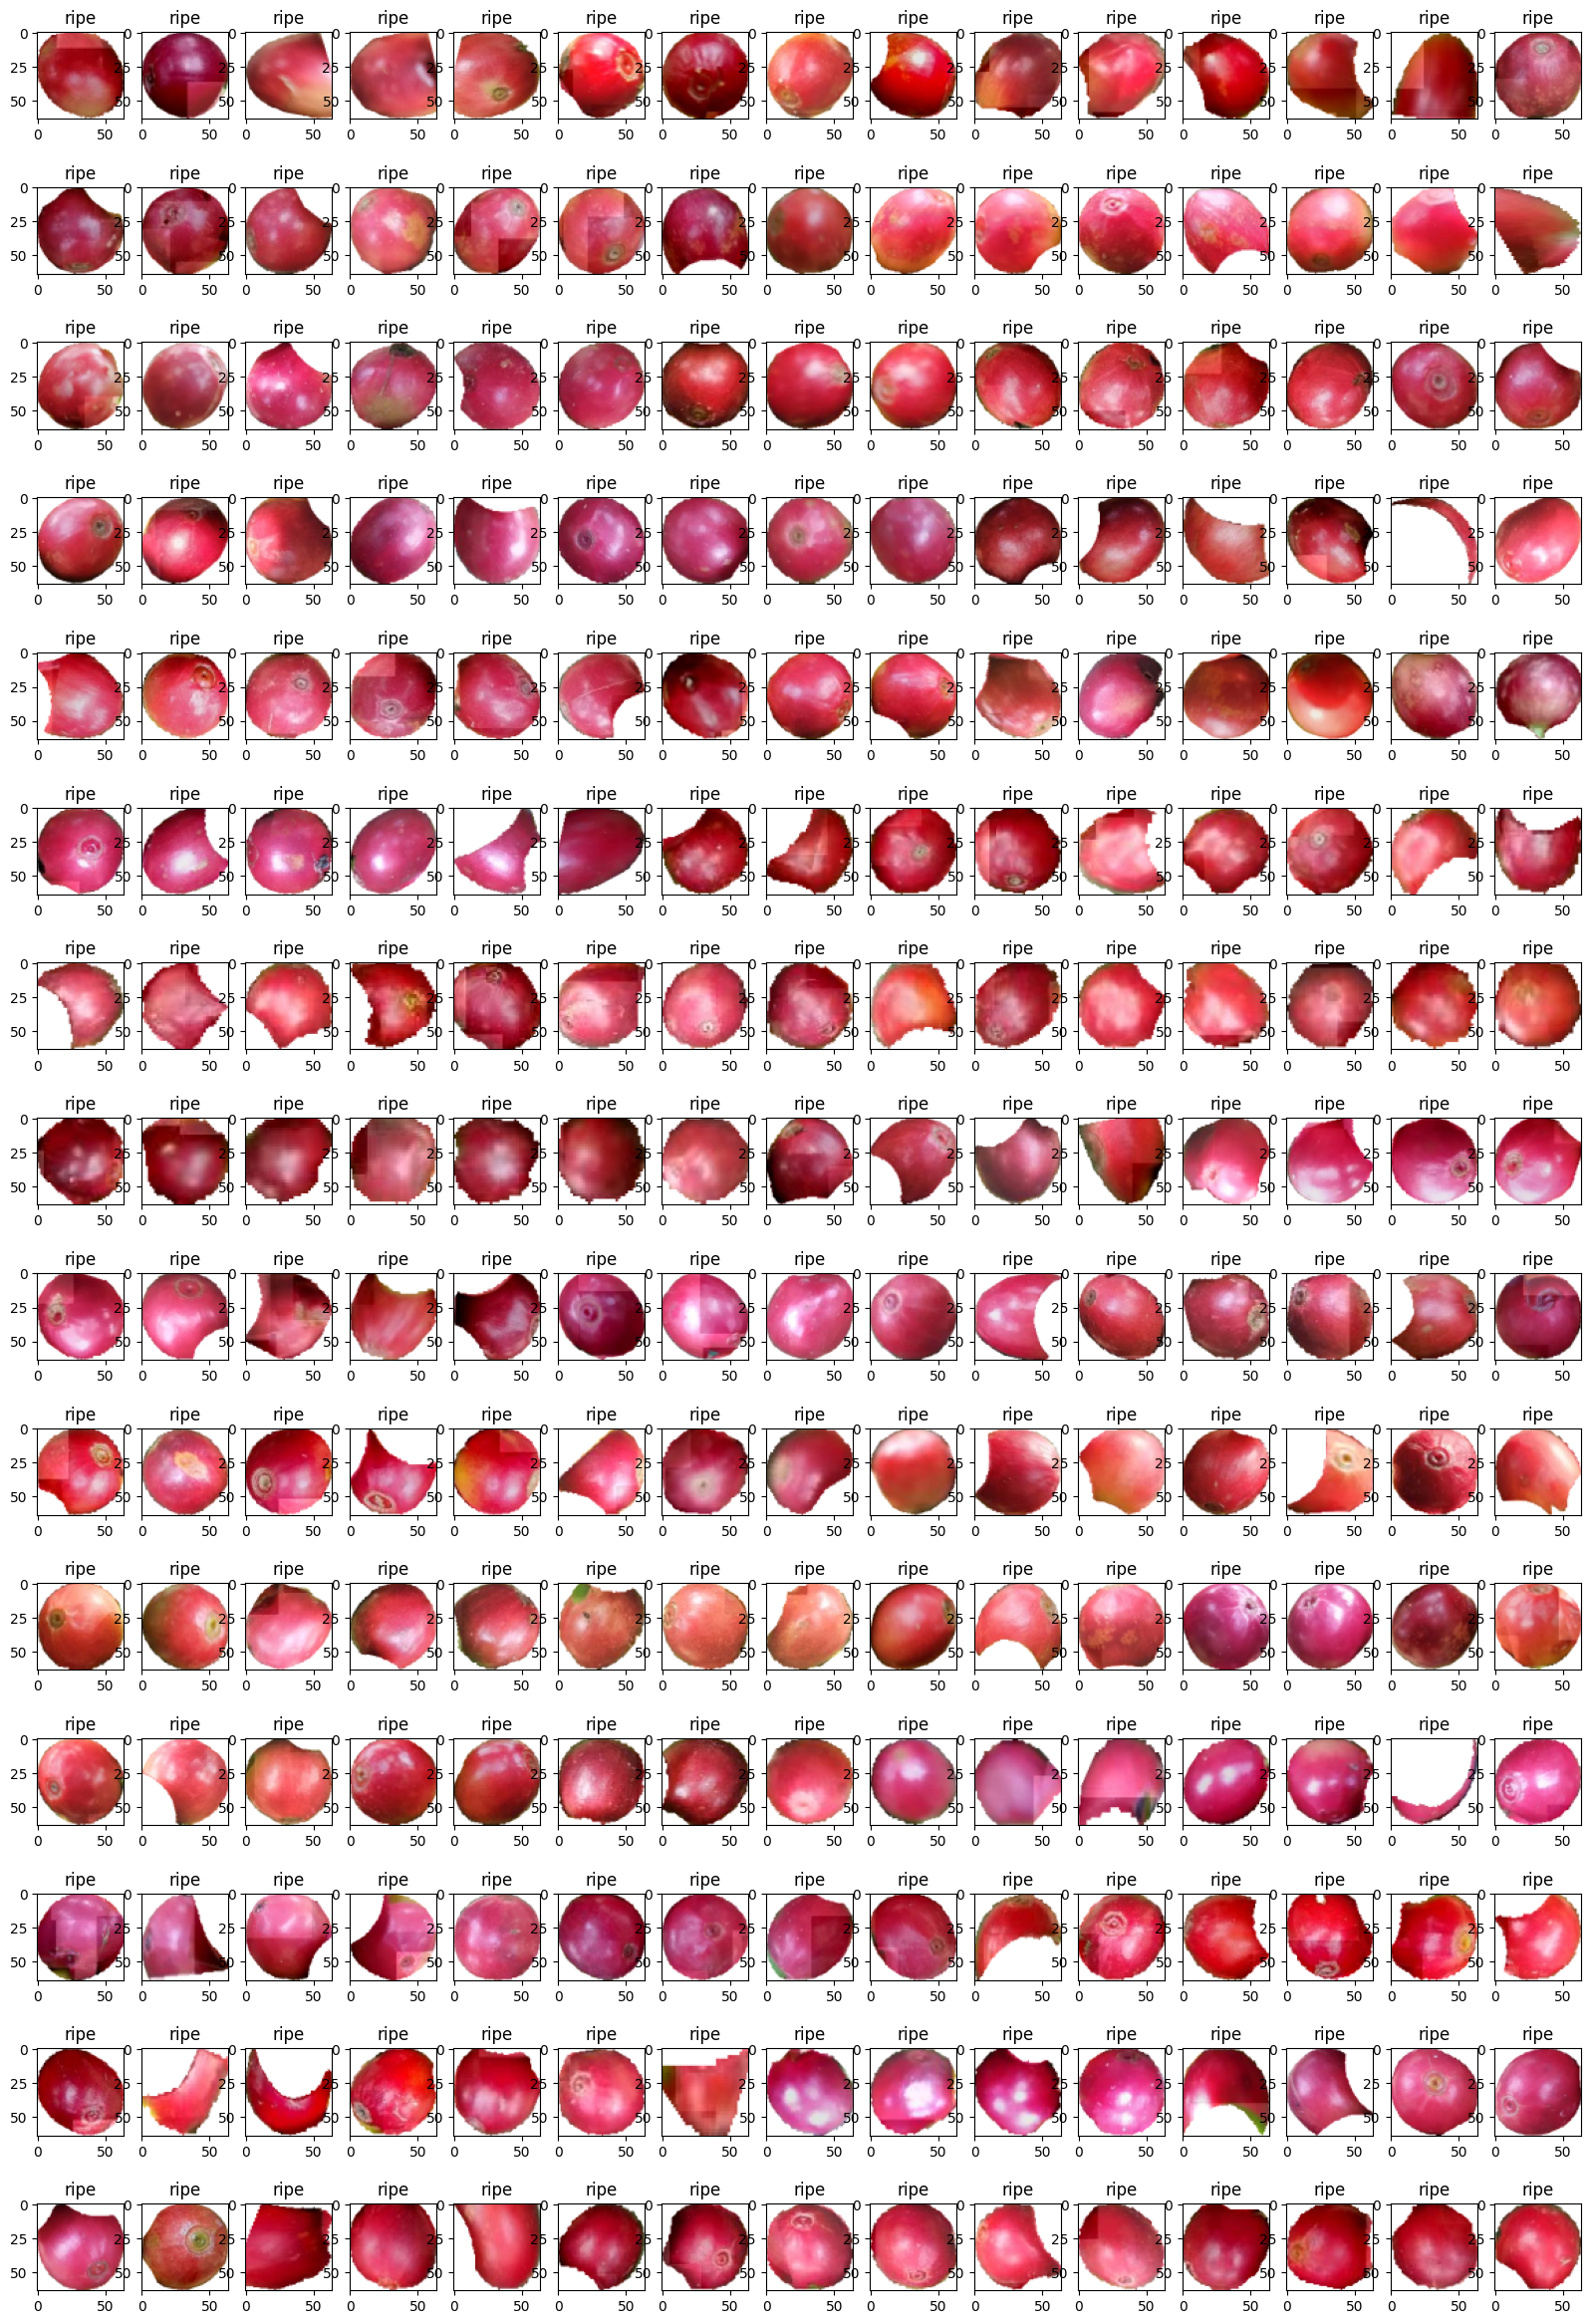

In [10]:
fig, ax = plt.subplots(15, 15, figsize=(20, 30))  
img_id = 15000
for i in range(len(ax)): 
    for j in range(len(ax[i])):
      # ax[i,j].imshow(test_images_gr[0].reshape(28,28))
      # ax[i,j].set_title('Title - ' + str(i) + str(j))
      ax[i,j].imshow(X_train[img_id])
      fruit_label = digit_to_label(digit=Y_train[img_id])
      ax[i,j].set_title(fruit_label)
      img_id += 1 

In [11]:
import numpy as np
# normalize inputs from 0-255 to 0.0-1.0
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

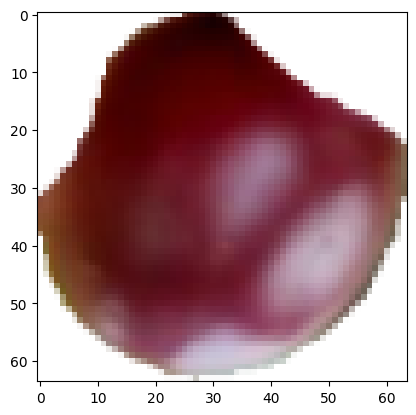

In [12]:
plt.imshow(X_train[17])
plt.show()

In [13]:
# one hot encode outputs
y_train = keras.utils.to_categorical(Y_train)
y_test = keras.utils.to_categorical(Y_test)
num_classes = y_test.shape[1]

In [14]:
# Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=30,
    verbose=1,
    restore_best_weights=True
)

In [15]:
model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [16]:
# Create a larger model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (1, 1), activation='sigmoid', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='tanh', padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation='sigmoid', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (1, 1), activation='tanh', padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 100
lrate = 0.001
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, weight_decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,043,748 (34.50 MB)

 Trainable params: 9,043,748 (34.50 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, callbacks=[early_stopping, model_checkpoint])
# Final evaluation of the model
model.load_weights('best_model.keras')
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100


2024-07-17 03:58:26.991636: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.74267, expected 2.93226
2024-07-17 03:58:26.991697: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 3.81792, expected 3.00751
2024-07-17 03:58:26.991706: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 5.10301, expected 4.2926
2024-07-17 03:58:26.991715: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 4.26842, expected 3.45801
2024-07-17 03:58:26.991723: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.07757, expected 4.26716
2024-07-17 03:58:26.991731: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.13438, expected 4.32397
2024-07-17 03:58:26.991739: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.00142, expected 5.191
2024-07-17 03:58:26.991747: E external/local_xla/xla/servi

  21/1188 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.2573 - loss: 1.5122 

I0000 00:00:1721188713.768901     128 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721188713.789847     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1183/1188 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2635 - loss: 1.4192

2024-07-17 03:58:48.163356: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.09141, expected 3.28203
2024-07-17 03:58:48.163417: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.01604, expected 4.20666
2024-07-17 03:58:48.163426: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 5.70977, expected 4.90039
2024-07-17 03:58:48.163434: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 4.72733, expected 3.91795
2024-07-17 03:58:48.163442: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.4553, expected 4.64593
2024-07-17 03:58:48.163450: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 4.99454, expected 4.18517
2024-07-17 03:58:48.163457: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 7.04797, expected 6.23859
2024-07-17 03:58:48.163465: E external/local_xla/xla/ser

1188/1188 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2635 - loss: 1.4191

W0000 00:00:1721188735.590276     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-07-17 03:58:56.230970: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.47098, expected 2.9042
2024-07-17 03:58:56.231058: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.39906, expected 3.83228
2024-07-17 03:58:56.231079: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 3.90625, expected 3.33947
2024-07-17 03:58:56.231090: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 4.45768, expected 3.8909
2024-07-17 03:58:56.231101: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14: 4.41738, expected 3.8506
2024-07-17 03:58:56.231112: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15: 4.15125, expected 3.58447
2024-07-17 03:58:56.231123: E external/local_xla/xla/service/gpu/


Epoch 1: val_loss improved from inf to 1.37723, saving model to best_model.keras


W0000 00:00:1721188737.031595     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1188/1188 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2635 - loss: 1.4191 - val_accuracy: 0.2908 - val_loss: 1.3772
Epoch 2/100
1182/1188 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2775 - loss: 1.3805
Epoch 2: val_loss improved from 1.37723 to 0.71709, saving model to best_model.keras
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.2778 - loss: 1.3802 - val_accuracy: 0.6894 - val_loss: 0.7171
Epoch 3/100
1186/1188 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6853 - loss: 0.6802
Epoch 3: val_loss improved from 0.71709 to 0.57960, saving model to best_model.keras
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6854 - loss: 0.6801 - val_accuracy: 0.7557 - val_loss: 0.5796
Epoch 4/100
1183/1188 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7586 - loss: 0.5673
Epoch 4: val_loss improved from 0.57960 to 0.36492, saving model to best_model.keras
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7587 - loss: 0.5671 - val_accuracy: 0.8538 - val_loss: 0.36

In [18]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

y_pred = np.round(model.predict(X_test),0)
vehicle_types = ['overripe', 'ripe', 'semi_ripe', 'unripe']
classification_metrics = metrics.classification_report(y_test, y_pred, target_names=vehicle_types)
print(classification_metrics)

 83/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1721189275.562264     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

    overripe       0.97      0.92      0.95      1099
        ripe       0.92      0.90      0.91      1698
   semi_ripe       0.88      0.90      0.89      1957
      unripe       0.96      0.97      0.97      1975

   micro avg       0.93      0.92      0.93      6729
   macro avg       0.93      0.92      0.93      6729
weighted avg       0.93      0.92      0.93      6729
 samples avg       0.92      0.92      0.92      6729



W0000 00:00:1721189276.405933     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
